# Importing data in Python part 1
<br>
Importing entire text files <br>
Importing text files line by line<br>
Importing flat files using NumPy <br>
Working with mixed data types<br>
Importing flat files using pandas<br>
Pickled files - serialized <br>
Excel Spreadsheets<br>
MATLAB files<br>
SAS files<br>
Strata files<br>
HDF5 files<br>
Relational databases: PostGreSQL, MySQL, SQLite, SQL <br>





### Reading a text file

In [ ]:
filename='any_name.txt'
file = open(filename, mode='r')  # r means read only
text= file.read()
file.close()

#printing a text file
print(text)

### Writing to a file

In [ ]:
filename = 'any_file_name.txt'
file=open(filename, mode='w')  # w - means to write
file.close()

### Context manager with


In [ ]:
with open('any_file_name','r') as file:
    print(file.read())

### Importing flat files (NumPy)

In [ ]:
import numpy as n np
filename = 'anyfile.txt'
data = np.loadtxt(filename, delimeter=',')
print(data)

In [ ]:
#customizing NumPy import
data = np.loadtxt(filename, delimeter=',', skiprows=1)

In [ ]:
#customizing NumPy import
data = np.loadtxt(filename, delimeter=',', skiprows=1, usecols=[0,2])

In [ ]:
#customizing NumPy import
data = np.loadtxt(filename, delimeter=',', dtype=str)

In [ ]:
Instructions
-Complete the arguments of np.loadtxt(): the file you're importing is tab-delimited,
you want to skip the first row and you only want to import the first and third columns.
-Complete the argument of the print() call in order to print the entire array that you
just imported.
'''
# Import numpy
import numpy as np

# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])

# Print data
print(data)

### Importing flat files using pandas

In [ ]:
import pandas as pd
filename='anything.csv'
data=pd.read_csv(filename)
data.head()

#convert to array
data_array=data.values


### Importing pickled files



In [ ]:
import pickle
with open ('pickled_fruit.pkl', 'rb') as file:
    data=pickle.load(file)
print(data)

### importing Excel spreadsheets

In [ ]:
import panda as pd
file='urbanpop.xlsx'
data=pd.ExcelFile(file)
print(data.sheet_names)

df1=data.parse('1960-1966')  # '1960-1966'sheet name, as a string

df2=data.parse(0)  #sheet index as a float

### Importing SAS/Strata files using pandas
SAS files used for advanced analytics, multivariate analysis, business intelligence, data management, predictive analytisc, standard for computational analysis

In [ ]:
#importing SAS files
import pandas as pd
from sas7bdat import SAS7BDAT

with SAS7BDAT('urbanpop.sas7bdat') as file:
    df_sas=file.to_data_frame()

In [ ]:
#importing strata files
import pandas as pd
data=pd.read_strata('urbanpop.dta')

### Importing HDF5 files
<br>
Hierarchical Data format version 5 <br>
Standard for storing large quantities of numerical data<br>
Datasets can be hundreds of gigabytes or terabytes<br>
HDF5 can scale to exabytes<br>


In [ ]:
import h5py
filename='H-H1_LOSC_7y8y86t8-4096.hdf5'
data = h5py.File(filename, 'r') # "r" is to read
print(type(data))

### The structure of HDF5 files
for key in data.keys():
           print(key)

meta
quality
strain

print(type(data['meta']))


### MATLAB files
matrix laboratory, industry standard in engineering and science
data saves as .mat files <br>

### Scipy to read MATLAB files
scipy.io.loadmat() - read .mat files
scipy.io.savemat() - write .mat files


### importing a .mat file

In [ ]:
import scipy.io
filename='workspace.mat'
mat=scipy.io.loadmat(filename)

print(type(mat))
print(type(mat['x']))

### Relational Databases SQL

Creating a database engine
SQLite datadatse
SQLAlchemy - works with many relational database management systems

In [ ]:
from sqlalchemy import create_engine
engine=create_engine('sqlite://Northwind.sqlite')

### Getting table names

In [ ]:
from sqlalchemy import create_engine
engine=create_engine('sqlite://Northwind.sqlite')
table_names=engine.table_names()
print(table_names)

### Querying relational databases in Python

SELECT * FROM Table_name
- will return all columns of all rows of the table

SELECT * from Orders


In [ ]:
from sqlalchemy import create_engine
import pandas as pd
engine=create_engine('sqlite://Northwind.sqlite') # create a database engine
con=engine.connect  #connect to engine
rs=con.execute("SELECT * FROM Orders") #querry database
df=pd.DataFrame(rs.fetchall())  #save querry results to a dataframe
con.close()  #close connection


#print querry results
print(df.head())  # no headers in table

In [ ]:
#set the DataFrame column names
df.columns=rs.keys()
print(df.head())  #will look like a proper table with headers

In [ ]:
#using the context manager
with engine.connect() as con:
    rs=con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")
    df=pd.DataFrame(rs.fetchmany(size=5))
    df.columns=rs.keys()
    
#pandas way to querry

df=pd.read_sql_querry("SELECT * FROM Orders", engine)

### Advances querying (SELECT), JOININg tables

In [ ]:
#INNER JOIN
df=pd.read_sql_query("SELECT OrderID,  \
CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID= \
Customers.CustomerID", engine)

print(df.head())

In [ ]:
#SELECT
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///../_datasets/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

## Practice exercises

['Time' 'Percent']
[0.    0.357]


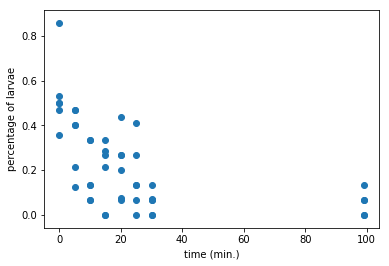

In [2]:
'''
The file seaslug.txt

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
........

has a text header, consisting of strings
is tab-delimited.
These data consists of percentage of sea slug larvae that had metamorphosed in a
given time period. Read more here.
Due to the header, if you tried to import it as-is using np.loadtxt(), Python
would throw you a ValueError and tell you that it could not convert string to float. There are two ways to deal with this:
firstly, you can set the data type argument dtype equal to str (for string).
Alternatively, you can skip the first row as we have seen before, using the skiprows
argument.

Instructions
-Complete the first call to np.loadtxt() by passing file as the first argument.
-Execute print(data[0]) to print the first element of data.
-Complete the second call to np.loadtxt(). The file you're importing is tab-delimited,
the datatype is float, and you want to skip the first row.
-Print the 10th element of data_float by completing the print() command. Be guided by
the previous print() call.
-Execute the rest of the code to visualize the data.
'''
import numpy as np
import matplotlib.pyplot as plt

# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
# ['Time' 'Percent']
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
# [0.    0.357]
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin    Embarked  
0         A/5 21171   7.2500   NaN  S #dfafdad  
1       PC 17599#to  71.2833   C85           C  
2  STON/O2. 3101282   7.9250   NaN           S  
3            113803  53.1000  C123           S  
4            373450   8.0500   NaN           S  


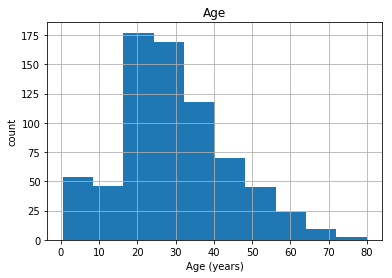

In [5]:
'''
Instructions
-Complete the sep (the pandas version of delim), comment and na_values arguments of
pd.read_csv(). comment takes characters that comments occur after in the file, which
in this case is '#'. na_values takes a list of strings to recognize as NA/NaN, in
this case the string 'Nothing'.
-Execute the rest of the code to print the head of the resulting DataFrame and plot
the histogram of the 'Age' of passengers aboard the Titanic.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

In [ ]:
'''
Importing entire text files
100xp
In this exercise, you'll be working with the file moby_dick.txt. It is a text
file that contains the opening sentences of Moby Dick, one of the great American
novels! Here you'll get experience opening a text file, printing its contents to
the shell and, finally, closing it.
Instructions
-Open the file moby_dick.txt as read-only and store it in the variable file. Make
sure to pass the filename enclosed in quotation marks ''.
-Print the contents of the file to the shell using the print() function. As Hugo
showed in the video, you'll need to apply the method read() to the object file.
-Check whether the file is closed by executing print(file.closed).
-Close the file using the close() method.
-Check again that the file is closed as you did above.
'''
# Open a file: file
file = open('../_datasets/moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

In [ ]:
'''
Importing text files line by line
100xp
For large files, we may not want to print all of their content to the shell:
you may wish to print only the first few lines. Enter the readline() method,
which allows you to do this. When a file called file is open, you can print out
the first line by executing file.readline(). If you execute the same command again,
the second line will print, and so on.
In the introductory video, Hugo also introduced the concept of a context manager.
He showed that you can bind a variable file by using a context manager construct:
with open('huck_finn.txt') as file:
While still within this construct, the variable file will be bound to open('huck_finn.txt');
thus, to print the file to the shell, all the code you need to execute is:
with open('huck_finn.txt') as file:
    print(file.read())
You'll now use these tools to print the first few lines of moby_dick.txt!
Instructions
-Open moby_dick.txt using the with context manager and the variable file.
-Print the first three lines of the file to the shell by using readline() three
times within the context manager.
'''
# Read & print the first 3 lines
with open('../_datasets/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

In [25]:
'''
Using NumPy to import flat files
100xp
In this exercise, you're now going to load the MNIST digit recognition dataset using
the numpy function loadtxt() and see just how easy it can be:
-The first argument will be the filename.
-The second will be the delimiter which, in this case, is a comma.
You can find more information about the MNIST dataset here on the webpage of Yann LeCun,
who is currently Director of AI Research at Facebook and Founding Director of the NYU
Center for Data Science, among many other things.
Instructions
-Fill in the arguments of np.loadtxt() by passing file and a comma ',' for the delimiter.
-Fill in the argument of print() to print the type of the object digits. Use the function type().
-Execute the rest of the code to visualize one of the rows of the data.
'''

# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = 'mnist_test.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')
#digits = pd.read_csv(file, nrows=29, header=None)


# Print datatype of digits
print(type(digits))
#digits=digits.astype(int)
# Select and reshape a row
im = digits[21, 1:]


<class 'numpy.ndarray'>


In [26]:
im_sq = np.reshape(im, (28, 28))


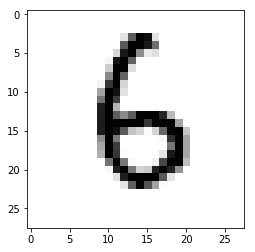

In [27]:
# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

It is common to need to reshape a one-dimensional array into a two-dimensional array with one column and multiple arrays.

NumPy provides the reshape() function on the NumPy array object that can be used to reshape the data.

The reshape() function takes a single argument that specifies the new shape of the array. In the case of reshaping a one-dimensional array into a two-dimensional array with one column, the tuple would be the shape of the array as the first dimension (data.shape[0]) and 1 for the second dimension.

data = data.reshape((data.shape[0], 1))
1
data = data.reshape((data.shape[0], 1))


In [ ]:
'''
Using pandas to import flat files as DataFrames (1)
100xp
In the last exercise, you were able to import flat files containing columns with
different datatypes as numpy arrays. However, the DataFrame object in pandas is a
more appropriate structure in which to store such data and, thankfully, we can easily
import files of mixed data types as DataFrames using the pandas functions read_csv()
and read_table().
Instructions
-Import the pandas package using the alias pd.
-Read titanic.csv into a DataFrame called df. The file name is already stored in
the file object.
-In a print() call, view the head of the DataFrame.
'''
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = '../_datasets/titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())

In [ ]:
'''
Using pandas to import flat files as DataFrames (2)
100xp
In the last exercise, you were able to import flat files into a pandas
DataFrame. As a bonus, it is then straightforward to retrieve the corresponding
numpy array using the attribute values. You'll now have a chance to do this using
the MNIST dataset, which is available as digits.csv.
Instructions
-Import the first 5 rows of the file into a DataFrame using the function pd.read_csv()
and assign the result to data. You'll need to use the arguments nrows and header
(there is no header in this file).
-Build a numpy array from the resulting DataFrame in data and assign to data_array.
-Execute print(type(data_array)) to print the datatype of data_array.
'''
import numpy as np
import pandas as pd

# Assign the filename: file
file = '../_datasets/digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))

In [ ]:
'''
Working with mixed datatypes (1)
50xp
Much of the time you will need to import datasets which have different datatypes
in different columns; one column may contain strings and another floats, for example.
The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(),
which can handle such structures. If we pass dtype=None to it, it will figure out what
types each column should be.
Import 'titanic.csv' using the function np.genfromtxt() as follows:
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
Here, the first argument is the filename, the second specifies the delimiter , and the
third argument names tells us there is a header. Because the data are of different types,
data is an object called a structured array. Because numpy arrays have to contain elements
that are all the same type, the structured array solves this by being a 1D array, where
each element of the array is a row of the flat file imported. You can test this by checking
out the array's shape in the shell by executing np.shape(data).
Acccessing rows and columns of structured arrays is super-intuitive: to get the ith row,
merely execute data[i] and to get the column with name 'Fare', execute data['Fare'].
Print the entire column with name Survived to the shell. What are the last 4 values of this column?
Possible Answers
-1,0,0,1
-1,2,0,0
-1,0,1,0
-0,1,0
'''
import numpy as np

data = np.genfromtxt('../_datasets/titanic.csv', delimiter=',', names=True, dtype=None)

print(np.shape(data))

print(data['Survived'])

# 1,0,1,0

In [ ]:
'''
Working with mixed datatypes (2)
100xp
You have just used np.genfromtxt() to import data containing mixed datatypes. There
is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(),
except that its default dtype is None. In this exercise, you'll practice using this
to achieve the same result.
Instructions
-Import titanic.csv using the function np.recfromcsv() and assign it to the variable,
d. You'll only need to pass file to it because it has the defaults delimiter=',' and
names=True in addition to dtype=None!
-Run the remaining code to print the first three entries of the resulting array d.
'''
import numpy as np

# Assign the filename: file
file = '../_datasets/titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])

In [ ]:
#loading pickled file
'''
Loading a pickled file
100xp
There are a number of datatypes that cannot be saved easily to flat files, such as lists
and dictionaries. If you want your files to be human readable, you may want to save them as
text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.
However, if you merely want to be able to import them into Python, you can serialize them.
All this means is converting the object into a sequence of bytes, or a bytestream.
In this exercise, you'll import the pickle package, open a previously pickled data structure
from a file and load it.
Instructions
-Import the pickle package.
-Complete the second argument of open() so that it is read only for a binary file. This
argument will be a string of two letters, one signifying 'read only', the other 'binary'.
-Pass the correct argument to pickle.load(); it should use the variable that is bound to open.
-Print the data, d.
-Print the datatype of d; take your mind back to your previous use of the function type().
'''
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

In [ ]:
#listing sheets in excel file
'''
Listing sheets in Excel files
100xp
Whether you like it or not, any working data scientist will need to deal
with Excel spreadsheets at some point in time. You won't always want to do
so in Excel, however!
Here, you'll learn how to use pandas to import Excel spreadsheets and how to
list the names of the sheets in any loaded .xlsx file.
Recall from the video that, given an Excel file imported into a variable spreadsheet,
you can retrieve a list of the sheet names using the attribute spreadsheet.sheet_names.
Specifically, you'll be loading and checking out the spreadsheet 'battledeath.xlsx',
modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains
age-adjusted mortality rates due to war in various countries over several years.
Instructions
Assign the filename to the variable file.
Pass the correct argument to pd.ExcelFile() to load the file using pandas.
Print the sheetnames of the Excel spreadsheet by passing the necessary argument to
the print() function.
'''
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = '../_datasets/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)


In [ ]:
#Importing sheets from excel files

'''
Importing sheets from Excel files
100xp
In the previous exercises, you saw that the Excel file contains two sheets,
'2002' and '2004'. The next step is to import these.
In this exercise, you'll learn how to import any given sheet of your loaded
.xslx file as a DataFrame. You'll be able to do so by specifying either the
sheet's name or its index.
The spreadsheet 'battledeath.xlsx' is already loaded as xl.
Instructions
-Load the sheet '2004' into the DataFrame df1 using its name as a string.
-Print the head of df1 to the shell.
-Load the sheet 2002 into the DataFrame df2 using its index.
-Print the head of df2 to the shell.
'''
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = '../_datasets/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xl.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

In [ ]:
#customizing import from EXcel file
'''
Customizing your spreadsheet import
100xp
Here, you'll parse your spreadsheets and use additional arguments to skip rows,
rename columns and select only particular columns.
The spreadsheet 'battledeath.xlsx' is already loaded as xl.
As before, you'll use the method parse(). This time, however, you'll add the additional
arguments skiprows, names and parse_cols. These skip rows, name the columns and designate
which columns to parse, respectively. All these arguments can be assigned to lists
containing the specific row numbers, strings and column numbers, as appropriate.
Instructions
-Parse the first sheet by index. In doing so, skip the first row of data and name the
columns 'Country' and 'AAM due to War (2002)' using the argument names. The values passed
to skiprows and names all need to be of type list.
-Parse the second sheet by index. In doing so, parse only the first column with the
parse_cols parameter, skip the first row and rename the column 'Country'. The argument passed to parse_cols also needs to be of type list.
'''

# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = '../_datasets/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(0, parse_cols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

In [ ]:
#import strata files with read_strata
'''
Using read_stata to import Stata files
50xp
The pandas package has been imported in the environment as pd and
the file disarea.dta is in your working directory. The data consist
of disease extents for several diseases in various countries (more
information can be found here).
What is the correct way of using the read_stata() function to import
disarea.dta into the object df?
Possible Answers
-df = 'disarea.dta'
-df = read_stata.pd('disarea.dta')
-df = pd.read_stata('disarea.dta')
-df = pd.read_stata(disarea.dta)
'''
import pandas as pd

df = pd.read_stata('../_datasets/disarea.dta')


print(df.head())


In [ ]:
#importing strata files
'''
Importing Stata files
100xp
Here, you'll gain expertise in importing Stata files as DataFrames using
the pd.read_stata() function from pandas. The last exercise's file,
'disarea.dta', is still in your working directory.
Instructions
-Use pd.read_stata() to load the file 'disarea.dta' into the DataFrame df.
-Print the head of the DataFrame df.
-Visualize your results by plotting a histogram of the column disa10.
We’ve already provided this code for you, so just run it!
'''
import matplotlib.pyplot as plt

# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('../_datasets/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of coutries')
plt.show()

In [ ]:
#importing SAS files
'''
Importing SAS files
100xp
In this exercise, you'll figure out how to import a SAS file as a DataFrame
using SAS7BDAT and pandas. The file 'sales.sas7bdat' is already in your working
directory and both pandas and matplotlib.pyplot have already been imported as follows:
import pandas as pd
import matplotlib.pyplot as plt
The data are adapted from the website of the undergraduate text book Principles
of Economics by Hill, Griffiths and Lim.
Instructions
-Import the module SAS7BDAT from the library sas7bdat.
-In the context of the file 'sales.sas7bdat', load its contents to a DataFrame
df_sas, using the method to_data_frame() on the object file.
-Print the head of the DataFrame df_sas.
-Execute your entire script to produce a histogram plot!
'''
import pandas as pd
import matplotlib.pyplot as plt

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('../_datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

In [ ]:
#using file to import hdf5 files
'''
Using File to import HDF5 files
50xp
The h5py package has been imported in the environment and the file LIGO_data.hdf5 is loaded in the object h5py_file.
What is the correct way of using the h5py function, File(), to import the file in h5py_file into an object, h5py_data, for reading only?
Possible Answers
-h5py_data = File(h5py_file, 'r')
-h5py_data = h5py.File(h5py_file, 'r')
-h5py_data = h5py.File(h5py_file, read)
-h5py_data = h5py.File(h5py_file, 'read')
'''
import h5py

filename = '../_datasets/LIGO_data.hdf5'

h5py_data = h5py.File(filename, 'r')

print(type(h5py_data))

In [29]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


Strain


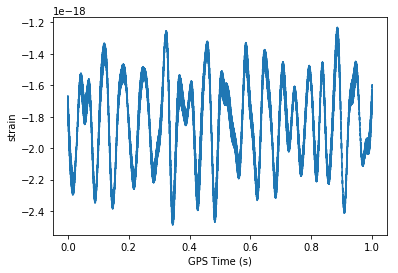

In [30]:
#extracting data from HDF5 file
'''
Extracting data from your HDF5 file
100xp
In this exercise, you'll extract some of the LIGO experiment's actual data
from the HDF5 file and you'll visualize it.
To do so, you'll need to first explore the HDF5 group 'strain'.
Instructions
-Assign the HDF5 group data['strain'] to group.
-In the for loop, print out the keys of the HDF5 group in group.
-Assign to the variable strain the values of the time series data
data['strain']['Strain'] using the attribute .value.
-Set num_samples equal to 10000, the number of time points we wish to sample.
-Execute the rest of the code to produce a plot of the time series data in LIGO_data.hdf5.
'''
# Import packages
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


In [31]:
## Loading .mat files MATLAB
'''
Loading .mat files
100xp
In this exercise, you'll figure out how to load a MATLAB file using scipy.io.loadmat()
and you'll discover what Python datatype it yields.
The file 'albeck_gene_expression.mat' is in your working directory. This file contains
gene expression data from the Albeck Lab at UC Davis. You can find the data and some
great documentation here.
Instructions
-Import the package scipy.io.
-Load the file 'albeck_gene_expression.mat' into the variable mat; do so using the
function scipy.io.loadmat().
-Use the function type() to print the datatype of mat to the IPython shell.
'''
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


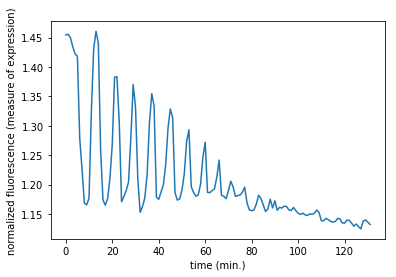

In [36]:
'''
The structure of .mat in Python
100xp
Here, you'll discover what is in the MATLAB dictionary that you loaded in the 
previous exercise.
The file 'albeck_gene_expression.mat' is already loaded into the variable mat.
The following libraries have already been imported as follows:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
Once again, this file contains gene expression data from the Albeck Lab at UCDavis.
You can find the data and some great documentation here.
Instructions
-Use the method .keys() on the dictionary mat to print the keys. Most of these keys
(in fact the ones that do NOT begin and end with '__') are variables from the
corresponding MATLAB environment.
-Print the type of the value corresponding to the key 'CYratioCyt' in mat. Recall
that mat['CYratioCyt'] accesses the value.
-Print the shape of the value corresponding to the key 'CYratioCyt' using the numpy
function shape().
-Execute the entire script to see some oscillatory gene expression data!
'''
# Import package
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

### SQL exercises

In [ ]:
# SELECT
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///../_datasets/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

In [ ]:
# Filtering with SELECT
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///../_datasets/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee WHERE EmployeeID >= 6')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

In [ ]:
# Filtering INNER JOIN
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    'SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = \
    Track.TrackID WHERE Milliseconds < 250000', engine)


In [ ]:
# Ordering with ORDER BY
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee ORDER BY BirthDate')
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

In [ ]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Album', engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager
# Perform query and save results to DataFrame: df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result: does df = df1 ?
print(df.equals(df1))